<h1 align="center"> Credit Fraud Detector </h1>

<h2>About:  </h2>

The files show credit card transactions recorded by European cardholders in September 2013. This dataset consists 492 frauds out of 284,807 transactions that occurred over the period of two days. The dataset is really imbalanced, with fraud transactions accounting for 0.172% of all transactions.


<h2> Gather Sense of Our Data: </h2>
<a id="gather"></a>
The first thing we must do is gather a <b> basic sense </b> of our data. Remember, except for the <b>transaction</b> and <b>amount</b> we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

<h3> Summary: </h3>
<ul>
<li>The transaction amount is relatively <b>small</b>. The mean of all the mounts made is approximately USD 88. </li>
<li>There are no <b>"Null"</b> values, so we don't have to work on ways to replace values. </li>
<li> Most of the transactions were <b>Non-Fraud</b> (99.83%) of the time, while <b>Fraud</b> transactions occurs (0.17%) of the time in the dataframe. </li>
</ul>


## Import Libraries

In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Analysis

In [67]:
df = pd.read_csv("creditcard.csv") # reading in dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [68]:
df.isnull().sum() # check missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Because the are no missing values lets visualize how many non-fruad vs fraud cases we have in this dataset

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


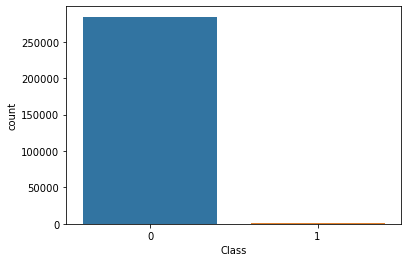

0    284315
1       492
Name: Class, dtype: int64


In [69]:
sns.countplot(df.Class)
plt.show()
print(df.Class.value_counts())

This dataset is highly unbalanced, lets separate it for statistical measures.

In [70]:
non_fraud = df[df.Class == 0] 
fraud = df[df.Class == 1]

In [71]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [72]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The mean of all the Non-fruad amounts made is approximately USD 88 while it is larger for the fruad, we must try to build a sample dataset of Non-fruad transactions containg similar distribution of to the one of Fruad transactions and create a new dataset combining both.

In [73]:
non_fraud_sample = non_fruad.sample(n = 492) # randomly sample the larger dataset

In [74]:
new_df = pd.concat([non_fruad_sample, fraud], axis = 0) # new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77002,56839.0,-1.358798,0.241333,1.909159,-2.046592,-0.664769,0.490652,-0.275508,0.951722,0.869374,...,0.363232,0.955001,-0.230209,-0.279166,0.483839,-0.591008,-0.009920,-0.017092,53.68,0
208477,137139.0,-2.435763,-0.248324,0.656707,-3.002862,-0.917100,-0.172796,-1.022342,0.841355,-2.332188,...,-0.144606,0.107949,0.223862,0.696318,0.784542,-0.182718,-0.335217,-0.082192,15.60,0
191459,129265.0,2.286954,-1.209759,-1.534512,-1.789623,-0.719573,-0.718512,-0.744285,-0.174201,-1.900338,...,-0.263930,-0.461949,0.334874,0.636673,-0.236138,-0.361062,-0.034118,-0.061413,19.80,0
239322,150047.0,2.044173,0.337590,-1.558132,1.374245,0.534499,-1.125713,0.710897,-0.481855,0.031748,...,0.058321,0.470760,-0.008681,0.022854,0.499051,-0.492445,-0.005840,-0.060920,1.00,0
198787,132653.0,-0.350046,0.590077,1.806191,-0.591011,0.470288,0.281675,0.526714,-0.015361,-0.026944,...,-0.106818,-0.100232,-0.099136,0.752436,-0.335921,-0.617912,-0.008520,-0.075229,6.24,0


In [75]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


### Splitting the data into Features & Targets

In [76]:
X = new_df.drop(columns = 'Class', axis=1)
Y = new_df['Class']

In [77]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
77002    56839.0 -1.358798  0.241333  1.909159 -2.046592 -0.664769  0.490652   
208477  137139.0 -2.435763 -0.248324  0.656707 -3.002862 -0.917100 -0.172796   
191459  129265.0  2.286954 -1.209759 -1.534512 -1.789623 -0.719573 -0.718512   
239322  150047.0  2.044173  0.337590 -1.558132  1.374245  0.534499 -1.125713   
198787  132653.0 -0.350046  0.590077  1.806191 -0.591011  0.470288  0.281675   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [78]:
print(Y)

77002     0
208477    0
191459    0
239322    0
198787    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## Split Data into Training & Testing Data

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [81]:
print(Y.shape, Y_train.shape, Y_test.shape)

(984,) (787,) (197,)


## Model Training
<h3> Logistic Regression </h3>

In [82]:
model = LogisticRegression()

In [83]:
# Use the Training Data to train the Logistic Regression Model
model.fit(X_train, Y_train)

LogisticRegression()

<h3> Accuracy Score </h3>

In [84]:
# accuracy on training data
X_train_pred = model.predict(X_train)
train_data_acc = accuracy_score(X_train_pred, Y_train)

In [85]:
print('Accuracy on Training Data : ', train_data_acc)

Accuracy on Training Data :  0.9237611181702668


In [86]:
# accuracy on test data
X_test_pred = model.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, Y_test)

In [87]:
print('Accuracy on Test Data : ', test_data_acc)

Accuracy on Test Data :  0.8934010152284264
